In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
x = pd.read_csv(r'C:\Users\ritik\Downloads\Training Data (2)\Linear_X_Train.csv')
y = pd.read_csv(r'C:\Users\ritik\Downloads\Training Data (2)\Linear_Y_Train.csv')

In [4]:
x = x.values
y = y.values

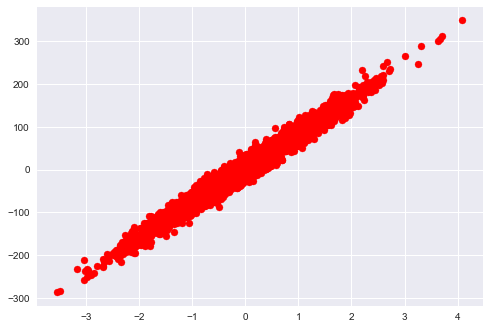

In [5]:
plt.style.use('seaborn')
plt.scatter(x,y,color = 'red')

In [47]:
def hypothesis(x,theta):
    y_ = theta[0] + theta[1]*x
    return y_
def gradient(x,y,theta):
    m = x.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        y_ = hypothesis(x[i],theta)
        grad[0] += (y_ - y[i])
        grad[1] += (y_ - y[i])*x[i]
    return grad/m
def error(x,y,theta):
    m = x.shape[0]
    total_error = 0
    for i in range(m):
        y_ = hypothesis(x[i],theta)
        
        total_error += (y_ - y[i])**2
    return total_error/m
def gradientDescent(x,y,learning_rate = 0.1,maxitr = 300):
    theta = np.zeros((2,))
    error_list = []
    theta_list = []
    for i in range(maxitr):
        grad = gradient(x,y,theta)
        e = error(x,y,theta)
        error_list.append(e)
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        
        theta_list.append((theta[0],theta[1]))

    return theta,error_list,theta_list

In [48]:
theta,error_list,theta_list  = gradientDescent(x,y)

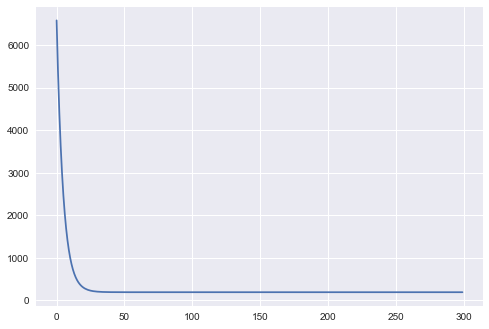

In [49]:
plt.plot(error_list)

In [50]:
y_  = hypothesis(x,theta)

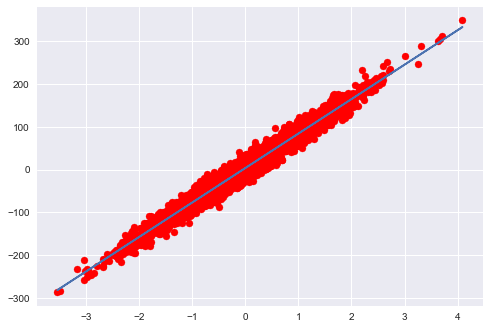

In [51]:
plt.style.use('seaborn')
plt.scatter(x,y,color = 'red')
plt.plot(x,y_)
plt.show()

In [52]:
def r2_score(Y,Y_):
    
        # Instead of Loop, np.sum is recommended as it is fast
    num = np.sum((Y-Y_)**2)
    denom = np.sum((Y- Y.mean())**2)
    score = (1- num/denom)
    return score*100

In [53]:
r2_score(y,y_)

97.09612233822354

### Linear Regression gives 97% accuracy

### Visualisation Gradient Descent

In [54]:
from mpl_toolkits.mplot3d import Axes3D


In [55]:
theta

array([ 3.72798828, 80.54363185])

In [56]:
T0 = np.arange(-40,40,1)
T1 = np.arange(40,120,1)

T0,T1 = np.meshgrid(T0,T1)
J = np.zeros(T0.shape)
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_ = T1[i,j]*x + T0[i,j]
        J[i,j] = np.sum((y-y_)**2)/y.shape[0]


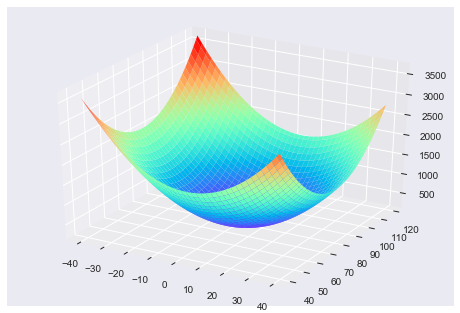

In [44]:
fig = plt.figure()
axes = fig.gca(projection = '3d')
axes.plot_surface(T0,T1,J,cmap = 'rainbow')
plt.show()

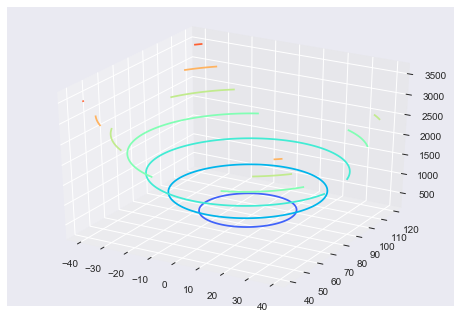

In [57]:
fig = plt.figure()
axes = fig.gca(projection = '3d')
axes.contour(T0,T1,J,cmap = 'rainbow')
plt.show()

### Change in values of theta

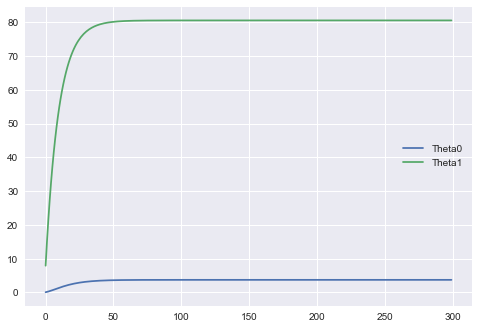

In [58]:
theta_list = np.array(theta_list)
plt.plot(theta_list[:,0],label = "Theta0")
plt.plot(theta_list[:,1],label = "Theta1")
plt.legend()
plt.show()

### Trajectory Traced by Theta Updates in the Loss Function

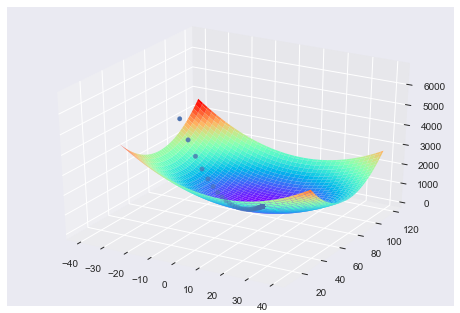

In [59]:
fig = plt.figure()
axes = fig.gca(projection = '3d')
axes.plot_surface(T0,T1,J,cmap = 'rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

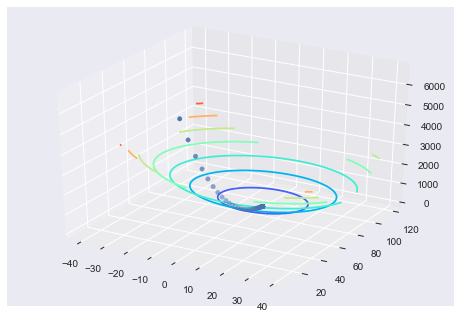

In [60]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

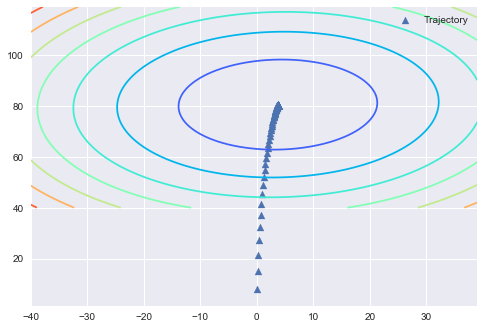

In [61]:

# 2D Contour Plot 
plt.contour(T0,T1,J,cmap='rainbow')
plt.scatter(theta_list[:,0],theta_list[:,1],marker='^',label='Trajectory')
plt.legend()
plt.show()

### Linear Regression Using Sklearn

In [70]:
from sklearn.linear_model import LinearRegression

In [63]:
model = LinearRegression()

In [64]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
model.coef_

array([[80.54363185]])

In [66]:
model.intercept_

array([3.72798828])

In [69]:
model.score(x,y)*100

97.09612233822354